Why colab? Free Access to GPUs and TPUs

ML training, especially deep learning, is resource-intensive.

Colab provides free access to NVIDIA GPUs and Google TPUs, which speeds up training drastically.

Without Colab, you’d need an expensive local GPU or cloud setup.
Like Google Docs, multiple people can edit and run notebooks together.

This is great for team projects or sharing ML experiments.
Colab is fast, free, collaborative, and ready-to-use, making it ideal for ML prototyping, learning, and small-to-medium scale experiments.

In [202]:
#Activate package
import numpy as np
import pandas as pd

In [203]:
# Title / ## Subtitle / ### Section
# **bold text**
# *italic text*

In [204]:
##Ctrl + enter run cell
# Ctrl + f9 run all
## Ctrl + MD delete cell
##Ctrl  MM chanage cel to markdown
## Ctrl MY change cell to code
## Ctrl MB add new cell below



# Start lesson

## Start lesson

### Start lesson

In [205]:
#extract data and give name
df = pd.read_csv("https://raw.githubusercontent.com/humayhasilli101/E-15---24-ML-/refs/heads/main/tips2.csv")

In [206]:
#check or heading dataset
df.head()

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,NaN,Female,No,Sun,Dinner,4


In [207]:
  #remove unnecessary column
df = df.drop("Unnamed: 0",  axis = 1)

In [208]:
#get information about classes of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         241 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [168]:
#get descriptive stats of datsaet
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,241.0,3.490415,4.665933,1.00,2.0000,2.920,3.7100,50.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [169]:
#check for categorical uniqueness
df.nunique()

,0
total_bill,229
tip,122
sex,2
smoker,2
day,4
time,2
size,6


In [170]:
# Check categories
#Categorical variable standardization
df['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,62
Fri,19


In [209]:
#df['day'] = df['day'].replace('Sunday', 'Saturday')

In [210]:
  #change data types
  df['sex'] = df['sex'].astype('category')
  df['smoker'] = df['smoker'].astype('category')
  df['day'] = df['day'].astype('category')
  df['time'] = df['time'].astype('category')
  df['size'] = df['size'].astype('int64')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         241 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [174]:
#  calculate the bill per person and stores it in a new column called "bill_for_1person".
df["bill_for_1person"] = df["total_bill"] / df["size"]
df.head()

,total_bill,tip,sex,smoker,day,time,size,bill_for_1person
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000
4,24.59,NaN,Female,No,Sun,Dinner,4,6.147500


In [175]:
# drop this new column
df = df.drop("bill_for_1person" , axis = 1)


In [176]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,NaN,Female,No,Sun,Dinner,4


In [177]:
#Highest tip amount
df.sort_values(by='tip', ascending = False)

,total_bill,tip,sex,smoker,day,time,size
179,34.63,50.0,Male,Yes,Sun,Dinner,2
110,14.00,42.0,Male,No,Sat,Dinner,2
24,19.82,36.0,Male,No,Sat,Dinner,2
170,50.81,10.0,Male,Yes,Sat,Dinner,3
212,48.33,9.0,Male,No,Sat,Dinner,4
...,...,...,...,...,...,...,...
67,3.07,1.0,Female,Yes,Sat,Dinner,1
236,12.60,1.0,Male,Yes,Sat,Dinner,2
4,24.59,NaN,Female,No,Sun,Dinner,4
25,17.81,NaN,Male,No,Sat,Dinner,4


In [178]:
##FIlter with and
df[(df['tip'] < 5) & (df['total_bill'] > 20)]

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
15,21.58,3.92,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
230,24.01,2.00,Male,Yes,Sat,Dinner,4
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2


In [179]:
##FIlter with or
df_1[(df_1['tip'] < 5) | (df_1['total_bill'] > 20)]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [180]:
# Only the first three rows of the DataFrame are returned.
df.iloc[0:3]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [181]:
#Only the first three rows are included.

#Only the first two columns (Name and Age) are included.
df.iloc[:3,:2]

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50


In [182]:
# Select tips greater than 5.
df[df.tip > 5]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
24,19.82,36.00,Male,No,Sat,Dinner,2
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
88,24.71,5.85,Male,No,Thur,Lunch,2
110,14.00,42.00,Male,No,Sat,Dinner,2
116,29.93,5.07,Male,No,Sun,Dinner,4


In [183]:
df["tip"].mean()

np.float64(3.4904149377593363)

In [184]:
df["tip"].max()

50.0

In [185]:
df["tip"].std()

4.665933435777806

In [186]:
#check null values
df.isnull().sum()

,0
total_bill,0
tip,3
sex,0
smoker,0
day,0
time,0
size,0


# Handling with NA
Handling missing values (NAs) is a crucial step in machine learning because most ML algorithms cannot work with missing data directly. How you handle them can significantly impact your model’s performance.

In [187]:
df.isnull().sum()

,0
total_bill,0
tip,3
sex,0
smoker,0
day,0
time,0
size,0


In [188]:
## SHow rows contain na
df[df.isnull().any(axis=1)]

,total_bill,tip,sex,smoker,day,time,size
4,24.59,NaN,Female,No,Sun,Dinner,4
25,17.81,NaN,Male,No,Sat,Dinner,4
79,17.29,NaN,Male,No,Thur,Lunch,2


In [189]:
# Remove rows with missing values
df_1 = df.dropna()

In [190]:
#Mean imputation:
df_2 = df.copy()
df_2['tip'].fillna(df_2['tip'].mean(), inplace=True)

/tmp/ipython-input-3335499931.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_2['tip'].fillna(df_2['tip'].mean(), inplace=True)


In [191]:
df_2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.010000,Female,No,Sun,Dinner,2
1,10.34,1.660000,Male,No,Sun,Dinner,3
2,21.01,3.500000,Male,No,Sun,Dinner,3
3,23.68,3.310000,Male,No,Sun,Dinner,2
4,24.59,3.490415,Female,No,Sun,Dinner,4


In [192]:
df_2.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [193]:
df_2.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.010000,Female,No,Sun,Dinner,2
1,10.34,1.660000,Male,No,Sun,Dinner,3
2,21.01,3.500000,Male,No,Sun,Dinner,3
3,23.68,3.310000,Male,No,Sun,Dinner,2
4,24.59,3.490415,Female,No,Sun,Dinner,4


In [194]:
df.select_dtypes(include=np.number).corr()

,total_bill,tip,size
total_bill,1.000000,0.247719,0.598315
tip,0.247719,1.000000,0.084956
size,0.598315,0.084956,1.000000


# Outlier problem

An outlier is a data point that is significantly different from other observations in your dataset. It may be much higher or lower than the typical values.
Dataset of house prices in a city: $100k, $120k, $110k, $115k, $10,000,000 → $10,000,000 is an outlier.
Outliers can distort your model because most ML algorithms assume that the data follows a certain pattern.


How to handle outliers :
Remove them if they are clearly errors.
Cap or floor them (replace with boundary values).



# IQR (Interquartile Range) = Q3 - Q1
# Lower outlier threshold: Q1 - 1.5 * IQR
# Upper outlier threshold: Q3 + 1.5 * IQR


<Axes: >

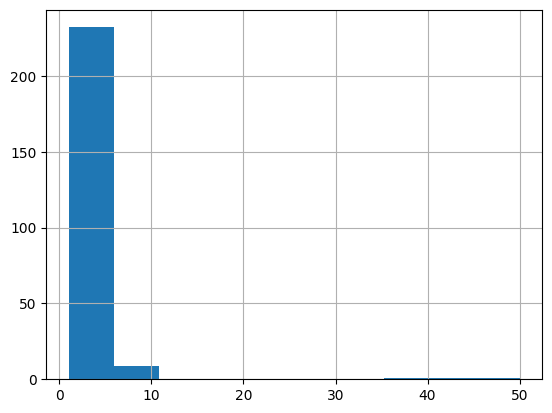

In [195]:
df_2['tip'].hist()

In [196]:
df_tip = df_2["tip"]
df_tip.describe().T

,tip
count,244.000000
mean,3.490415
std,4.637042
min,1.000000
25%,2.000000
50%,3.000000
75%,3.687500
max,50.000000


In [197]:
Q1 = df_tip.quantile(0.25)
Q3 = df_tip.quantile(0.75)
IQR = Q3-Q1

In [198]:

below = Q1- 1.5*IQR
above = Q3 + 1.5*IQR

In [199]:
below

np.float64(-0.53125)

In [219]:
df_2[df_2["tip"] > above]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
24,19.82,36.00,Male,No,Sat,Dinner,2
59,48.27,6.73,Male,No,Sat,Dinner,4
110,14.00,42.00,Male,No,Sat,Dinner,2
141,34.30,6.70,Male,No,Thur,Lunch,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
179,34.63,50.00,Male,Yes,Sun,Dinner,2
183,23.17,6.50,Male,Yes,Sun,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3


In [221]:
# Save clear data
clear_df = df_1[df_1["tip"] < above].dropna().reset_index()

In [227]:

# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns

# Define independent variables (X) and dependent variable (y)
X = clear_df[['total_bill', 'size']]  # predictors
y = clear_df['tip']                   # target

# Create linear regression model
model = LinearRegression()

# Fit model on the entire dataset
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate SSE (Sum of Squared Errors)
sse = np.sum((y - y_pred) ** 2)

# Calculate MSE (Mean Squared Error)
mse = sse / len(y)

# Calculate RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

# Print results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("SSE:", sse)
print("MSE:", mse)
print("RMSE:", rmse)

# Optional: R^2
r2 = model.score(X, y)
print("R^2 Score:", r2)

Coefficients: [0.07032171 0.20277299]
Intercept: 0.9984325104250864
SSE: 186.31720999401813
MSE: 0.8065680086321131
RMSE: 0.8980913141947834
R^2 Score: 0.3815077323063989


#We do train-test splitting in machine learning to evaluate how well our model will perform on new, unseen data.
##You split your data into two parts:

##Training set → used to teach the model

##Test set → used to check how well the model works on new data

##Think of it like studying for an exam:

##You practice on some questions (train set)

##Then the exam has new questions (test set) to see if you really learned.
##Usually 70-80% train, 20-30% test.

In [228]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Define independent variables (X) and dependent variable (y)
# For example, predict 'tip' based on 'total_bill' and 'size'
X = tips[['total_bill', 'size']]
y = tips['tip']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Coefficients: [0.09088117 0.26501754]
Intercept: 0.5681370921350064
Mean Squared Error: 0.6485996190543516
R^2 Score: 0.4811084097989491


In [229]:
# Import libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns

# Load tips dataset
tips = sns.load_dataset('tips')

# Define features and target
X = tips[['total_bill', 'size']]
y = tips['tip']

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create linear regression model
model = LinearRegression()

# Train model on training data
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Function to calculate SSE, MSE, RMSE, R2
def regression_metrics(y_true, y_pred):
    sse = np.sum((y_true - y_pred)**2)
    mse = sse / len(y_true)
    rmse = np.sqrt(mse)
    r2 = np.corrcoef(y_true, y_pred)[0,1]**2  # alternative: model.score(X, y)
    return sse, mse, rmse, r2

# Calculate metrics for training set
train_sse, train_mse, train_rmse, train_r2 = regression_metrics(y_train, y_train_pred)

# Calculate metrics for test set
test_sse, test_mse, test_rmse, test_r2 = regression_metrics(y_test, y_test_pred)

# Print results
print("=== Training Set ===")
print("SSE:", train_sse)
print("MSE:", train_mse)
print("RMSE:", train_rmse)
print("R^2:", train_r2)

print("\n=== Test Set ===")
print("SSE:", test_sse)
print("MSE:", test_mse)
print("RMSE:", test_rmse)
print("R^2:", test_r2)

=== Training Set ===
SSE: 217.24998169327785
MSE: 1.1141024702219378
RMSE: 1.055510525869798
R^2: 0.4516422761023768

=== Test Set ===
SSE: 31.78138133366323
MSE: 0.6485996190543516
RMSE: 0.8053568271607012
R^2: 0.5622356982040432


## Underfitting
### Definition: Model is too simple to capture the patterns in the data.
###Problem: Poor performance on both training and test data.
###Symptoms: Training error is high
###Test error is also high

###Solution:Icrease model complexity (e.g., add more features, use non-linear models)

#Overfitting
###Definition: Model is too complex and fits the training data too perfectly, including noise.
###Problem: Great performance on training data but poor performance on test/new data.
###Symptoms: Training error is very low
###Test error is high
###Train-test splitting helps detect overfitting: if test error is much higher than training error → overfitting